In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
landtemps = pd.read_csv("data/landtemps2019avgs.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

In [2]:
landtemps[['station','country','latabs','elevation','avgtemp']].\
  sample(10, random_state=1)

,station,country,latabs,elevation,avgtemp
10526,NEW_FORK_LAKE,United States,43.1167,2542.0,1.864167
1416,NEIR_AGDM,Canada,51.3667,1145.0,2.185000
2230,CURICO,Chile,34.9670,225.0,15.504167
6002,LIFTON_PUMPING_STN,United States,42.1231,1809.0,4.385833
2106,HUAILAI,China,40.4170,538.0,11.020833
2090,MUDANJIANG,China,44.5670,242.0,5.816667
7781,CHEYENNE_6SW_MESONET,United States,35.5461,694.0,14.875833
10502,SHARKSTOOTH,United States,37.5000,3267.5,4.105833
11049,CHALLIS_AP,United States,44.5228,1534.1,6.510000
2820,METHONI,Greece,36.8331,52.0,18.200000


In [3]:
landtemps.describe()

,latabs,elevation,avgtemp
count,12095.000000,12095.000000,12095.000000
mean,40.466791,589.330211,11.193542
std,12.611377,761.973468,8.563443
min,0.017000,-350.000000,-60.821000
25%,34.510300,78.000000,5.417917
50%,40.670300,271.300000,10.450000
75%,46.750550,817.500000,16.919583
max,90.000000,9999.000000,33.930000


In [4]:
landtemps.avgtemp.skew()

-0.26783825834817704

In [5]:
landtemps.avgtemp.kurtosis()

2.1698313707061074

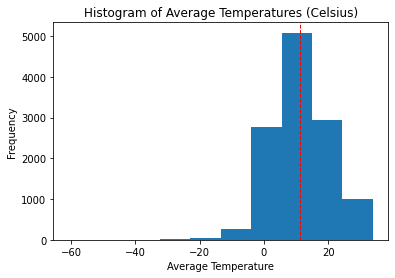

In [6]:
plt.hist(landtemps.avgtemp)
plt.axvline(landtemps.avgtemp.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of Average Temperatures (Celsius)")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

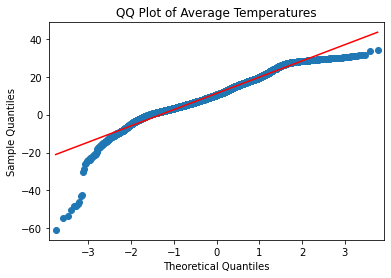

In [7]:
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']), line='s')
plt.title("QQ Plot of Average Temperatures")
plt.show()

In [8]:
covidtotals.total_cases_pm.skew()

4.284484653881833

In [9]:
covidtotals.total_cases_pm.kurtosis()

26.137524276840452

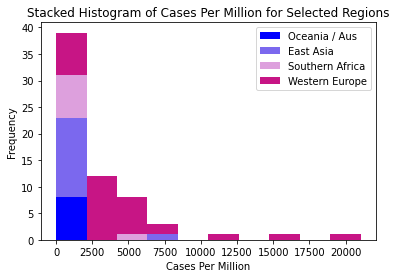

In [11]:
import numpy as np


showregions = ['Oceania / Aus','East Asia','Southern Africa', 'Western Europe']

def getcases(regiondesc):
  return covidtotals.loc[covidtotals.region==regiondesc,
    'total_cases_pm']

plt.hist([getcases(k) for k in showregions],\
  color=['blue','mediumslateblue','plum','mediumvioletred'],\
  label=showregions,\
  stacked=True)

plt.title("Stacked Histogram of Cases Per Million for Selected Regions")
plt.xlabel("Cases Per Million")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 22500, step=2500))
plt.legend()
plt.show()

In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


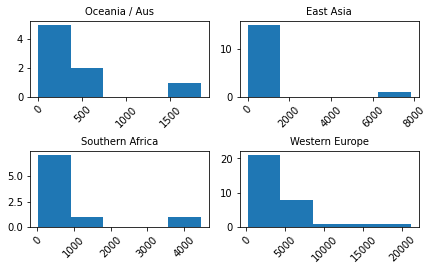

In [24]:
import seaborn

fig, axes = plt.subplots(2, 2)
#fig.title("Histograms of Covid Cases Per Million by Selected Regions")
axes = axes.ravel()
for j, ax in enumerate(axes):
  ax.hist(covidtotals.loc[covidtotals.region==showregions[j]].\
    total_cases_pm, bins=5)
  ax.set_title(showregions[j], fontsize=10)
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

In [26]:
nls97.satverbal.describe()

count    1406.000000
mean      499.724040
std       112.166256
min        14.000000
25%       430.000000
50%       500.000000
75%       570.000000
max       800.000000
Name: satverbal, dtype: float64

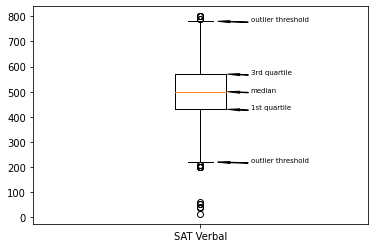

In [28]:
plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])
plt.annotate('outlier threshold', xy=(1.05,780), xytext=(1.15,780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,570), xytext=(1.15,570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,500), xytext=(1.15,500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08,430), xytext=(1.15,430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('outlier threshold', xy=(1.05,220), xytext=(1.15,220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('outlier threshold', xy=(1.95,15), xytext=(1.55,15), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.show()

In [29]:
weeksworked = nls97.loc[:, ['highestdegree','weeksworked16', 'weeksworked17']]

In [31]:
weeksworked.describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


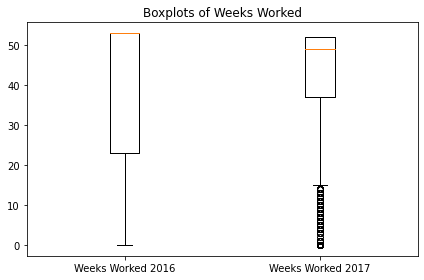

In [32]:
plt.boxplot([weeksworked.weeksworked16.dropna(),
  weeksworked.weeksworked17.dropna()],
  labels=['Weeks Worked 2016','Weeks Worked 2017'])
plt.title("Boxplots of Weeks Worked")
plt.tight_layout()
plt.show()

In [33]:
totvars = ['total_cases','total_deaths','total_cases_pm', 'total_deaths_pm']
totvarslabels = ['cases','deaths','cases per million','deaths per million']
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.090000e+02,209.000000,209.000000,209.000000
mean,6.075741e+04,2702.952153,2297.022144,73.636522
std,2.724401e+05,11894.963052,4039.840203,156.341672
min,3.000000e+00,0.000000,1.229000,0.000000
25%,3.420000e+02,9.000000,202.834000,2.809000
50%,2.820000e+03,53.000000,868.866000,15.216000
75%,2.561100e+04,386.000000,2784.865000,58.374000
max,3.247684e+06,134814.000000,35795.159000,1237.551000


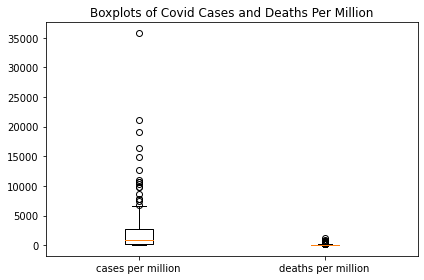

In [34]:
fig, ax = plt.subplots()
plt.title("Boxplots of Covid Cases and Deaths Per Million")
ax.boxplot([covidtotalsonly.total_cases_pm,covidtotalsonly.total_deaths_pm],\
  labels=['cases per million','deaths per million'])
plt.tight_layout()
plt.show()

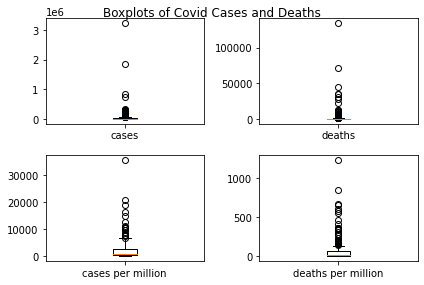

In [35]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Boxplots of Covid Cases and Deaths")
axes = axes.ravel()
for j, ax in enumerate(axes):
  ax.boxplot(covidtotalsonly.iloc[:, j], labels=[totvarslabels[j]])

plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()